In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip install Tensorflow 
!pip install Keras 
!pip install numpy 
!pip install matplotlib 

In [ ]:
import tensorflow as tf 
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D 
from keras.layers import Dense, Activation, Dropout, Flatten 
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np 
import matplotlib.pyplot as plt 
import csv,tarfile 



In [ ]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral 
batch_size = 256 
epochs = 5

In [ ]:
with open("fer.csv") as f: 
  content = f.readlines()  

In [ ]:
lines = np.array(content) 
num_of_instances = lines.size 
print(num_of_instances) 
print("instance length: ",len(lines[1].split(",")[1].split(" ")))  

2476
instance length:  2304


In [ ]:
emotion, img, usage = lines[1].split(",") 
print(img)

236 246 227 203 146 171 71 95 105 102 95 90 84 74 78 83 74 64 138 242 220 230 239 216 115 48 72 92 117 152 173 159 160 210 215 198 172 142 93 128 185 193 176 174 149 52 52 95 231 225 224 220 167 199 106 89 126 115 94 82 78 74 79 88 91 79 102 193 238 232 239 245 221 130 75 68 91 137 161 158 156 175 221 216 204 169 119 86 163 197 175 179 193 105 37 60 233 226 246 236 192 207 191 113 127 113 104 87 71 84 77 81 97 88 94 89 187 239 236 220 193 201 202 156 119 120 144 147 159 153 183 224 216 200 167 106 100 181 170 183 199 171 53 37 187 148 151 213 203 203 190 143 104 95 112 93 83 75 71 67 94 80 77 102 114 184 226 204 196 215 226 237 232 178 128 129 149 158 136 193 226 216 199 149 92 123 164 182 204 177 74 32 130 139 196 209 205 213 196 155 124 120 106 81 111 107 91 81 76 78 89 106 124 134 157 199 218 219 222 228 225 200 150 138 134 132 149 220 233 222 217 182 152 114 123 156 197 142 71 43 127 146 184 191 218 221 211 203 186 136 92 94 88 82 95 105 112 120 115 104 111 126 140 152 177 214 225 

In [ ]:
x_train, y_train, x_test, y_test = [], [], [], []  
#transfer train and test set data 
print(num_of_instances) 
n=0 
for i in range(1,num_of_instances):     
    try:         
      emotion, img, usage = lines[i].split(",")         
      val = img.split(" ")         
      pixels = np.array(val, 'float32')         
      emotion = keras.utils.to_categorical(emotion, num_classes)         
      n=n+1              
      if 'Training' in usage:             
        y_train.append(emotion)             
        x_train.append(pixels)         
      elif 'PublicTest' in usage:             
        y_test.append(emotion)             
        x_test.append(pixels)     
    except:         
        print("",end="") 

2476


In [ ]:
print(x_test[0])  
print(x_train[0])  

[254. 254. 254. ...  42. 129. 180.]
[236. 246. 227. ... 229. 220. 216.]


In [ ]:
x_train = np.array(x_train, 'float32') 
y_train = np.array(y_train, 'float32') 
x_test = np.array(x_test, 'float32') 
y_test = np.array(y_test, 'float32') 
x_train /= 255 #normalize inputs between [0, 1] 
x_test /= 255 
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1) 
x_train = x_train.astype('float32') 
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1) 
x_test = x_test.astype('float32') 
print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples')  

2461 train samples
14 test samples


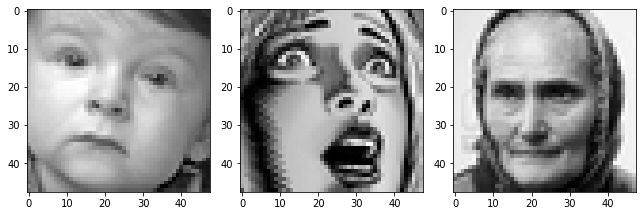

In [ ]:
import seaborn as sns 
plt.figure(0, figsize=(12,6)) 
for i in range(1, 4):     
  plt.subplot(1,4,i)     
  plt.imshow(x_train[i, :, :, 0], cmap="gray") 
plt.tight_layout() 
plt.show() 

In [ ]:
model = Sequential()  
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))  # 2nd convolution layer 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))  # 3rd convolution layer 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())  # fully connected neural networks 
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2)) 

In [ ]:
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax')) 

In [ ]:
gen = ImageDataGenerator() 
train_generator = gen.flow(x_train, y_train, batch_size=batch_size) 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy']) 

In [ ]:
fit = True 
if fit == True:     
  model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) 
  #train for randomly selected one 
else:     
  model.load_weights('/content/facial_expression_model_weights.h5') #load weights 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
256/256 [==============================] - 7s 2ms/step - loss: 1.8476 - accuracy: 0.2419


In [ ]:
score = model.evaluate(x_test, y_test) 
print('Test loss:', score[0]) 
print('Test accuracy:', 100*score[1]) 

1/1 [==============================] - 0s 198ms/step - loss: 1.8581 - accuracy: 0.3571
Test loss: 1.8580673933029175
Test accuracy: 35.71428656578064


In [ ]:
# function for drawing bar chart for emotion preditions  
def emotion_analysis(emotions):     
  objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')     
  y_pos = np.arange(len(objects))          
  plt.bar(y_pos, emotions, align='center', alpha=0.5)     
  
  plt.xticks(y_pos, objects)     
  plt.ylabel('percentage')     
  plt.title('emotion')       
  plt.show() 

In [ ]:
monitor_testset_results = False 
if monitor_testset_results == True: 
  predictions = model.predict(x_test) 
  index = 0 
  for i in predictions: 
    if index < 5 and index >= 1: 
      testing_img = np.array(x_test[index], 'float32') 
      testing_img = testing_img.reshape([48, 48]);         
      plt.gray() 
      plt.imshow(testing_img) 
      plt.show()             
      print(i) 
      emotion_analysis(i) 
      print("----------------------------------------------") 
    index = index + 1 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


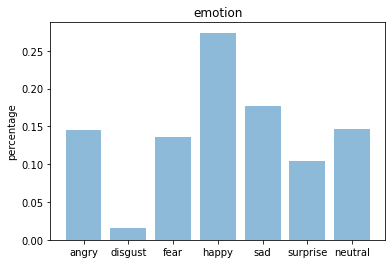

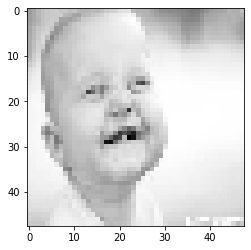

In [ ]:
img = image.load_img("happy_baby.jfif", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)  
x = np.expand_dims(x, axis = 0)  
x /= 255  
custom = model.predict(x)  
emotion_analysis(custom[0])  
x = np.array(x, 'float32')  
x = x.reshape([48, 48]);  
plt.gray()  
plt.imshow(x)  
plt.show() 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


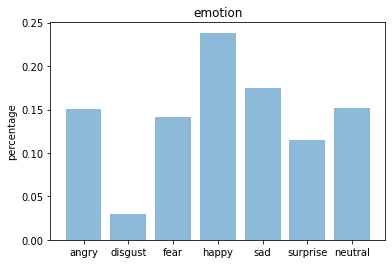

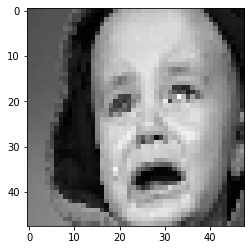

In [ ]:
img = image.load_img("sad_baby.jfif", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)  
x = np.expand_dims(x, axis = 0)  
x /= 255  
custom = model.predict(x)  
emotion_analysis(custom[0])  
x = np.array(x, 'float32')  
x = x.reshape([48, 48]);  
plt.gray()  
plt.imshow(x)  
plt.show() 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


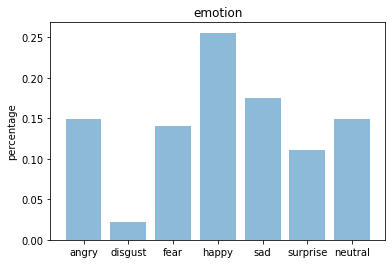

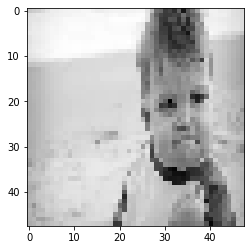

In [ ]:
img = image.load_img("angry_baby.jfif", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)  
x = np.expand_dims(x, axis = 0)  
x /= 255  
custom = model.predict(x)  
emotion_analysis(custom[0])  
x = np.array(x, 'float32')  
x = x.reshape([48, 48]);  
plt.gray()  
plt.imshow(x)  
plt.show() 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


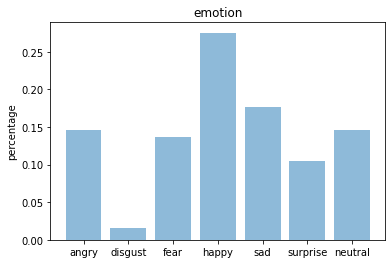

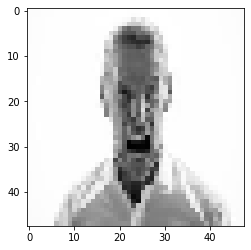

In [ ]:
img = image.load_img("angry_man.jfif", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)  
x = np.expand_dims(x, axis = 0)  
x /= 255  
custom = model.predict(x)  
emotion_analysis(custom[0])  
x = np.array(x, 'float32')  
x = x.reshape([48, 48]);  
plt.gray()  
plt.imshow(x)  
plt.show() 